# C031218 정현지

https://jhjdatavzhw3.streamlit.app/

## 과제3
1. 내용: 우리나라 전국 시군구 기준 Choropleth 지도를 구현하고, 각 시군구별 출생률(합계출산율)을 시각화하여 표시하시오.  

    - 시군구별(행정구역별) 합계출산율은 여기에서 다운 받을 수 있음  ->  https://gsis.kwdi.re.kr/statHtml/statHtml.do?orgId=338&tblId=DT_2AD0511R

2. 평가방법(10점 만점)

    - 기본(7점):  시군구 기준 Choropleth 지도 구현, 각 시군구별 출생률을 색으로 시각화

    - 응용(3점): 위의 시각화 내용을 streamlit으로 구현하여 배포

    - 마크다운, 코멘트 등으로 중요한 내용을 강조하여 설명할 것

3. 제출방법

   - 제출파일: 실행결과를 함께 볼 수 있도록 하나의 파일(HTML, PDF, ipynb, .py)로 만들어서 제출

      - Streamlit의 경우 코드(,py)에 배포 링크를 표시

   - 파일 제목: 교과목명_과제x번_학번_이름.확장자

   - 학번과 이름을 제일 위에 명시알 것 

4. 제출일시

     - 클래스룸 과제 마감일 확인 

## 0. 필요 라이브러리 로드 

In [43]:
# !pip install streamlit
# !pip install streamlit_folium

In [44]:
import pandas as pd

import geopandas as gpd

import folium
from folium import Choropleth

import streamlit as st
from streamlit_folium import folium_static

2024-11-25 23:09:26.627 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


## 1. 출산율 데이터 로드 및 전처리

In [14]:
fert = pd.read_csv("./datasets/Fertility.csv", encoding='cp949')
fert.head()

,행정구역별,2023,2023.1,2023.2,2023.3,2023.4,2023.5,2023.6,2023.7
0,행정구역별,합계출산율 (가임여성 1명당 명),모의 연령별출산율:15~19세 (해당연령 여자인구 1천명당 명),20~24세 (해당연령 여자인구 1천명당 명),25~29세 (해당연령 여자인구 1천명당 명),30~34세 (해당연령 여자인구 1천명당 명),35~39세 (해당연령 여자인구 1천명당 명),40~44세 (해당연령 여자인구 1천명당 명),45~49세 (해당연령 여자인구 1천명당 명)
1,전국,0.721,0.3,3.8,21.4,66.7,43.0,7.9,0.2
2,서울특별시,0.552,0.2,1.3,8.5,47.3,43.1,8.7,0.2
3,부산광역시,0.664,0.4,2.9,17.4,62.3,41.2,7.5,0.2
4,대구광역시,0.702,0.3,3.2,20.5,66.6,41.3,6.9,0.2


In [15]:
# fert_t = fert.T 
# fert_t = fert_t.reset_index(drop=True)
# display(fert_t.head(3))
# print(type(fert_t))

In [16]:
 # 첫 번째 행을 열 이름으로 설정하고, 첫 번째 행 삭제 
fert.columns = fert.iloc[0]
fert = fert[1:]
fert.head(3)

,행정구역별,합계출산율 (가임여성 1명당 명),모의 연령별출산율:15~19세 (해당연령 여자인구 1천명당 명),20~24세 (해당연령 여자인구 1천명당 명),25~29세 (해당연령 여자인구 1천명당 명),30~34세 (해당연령 여자인구 1천명당 명),35~39세 (해당연령 여자인구 1천명당 명),40~44세 (해당연령 여자인구 1천명당 명),45~49세 (해당연령 여자인구 1천명당 명)
1,전국,0.721,0.3,3.8,21.4,66.7,43.0,7.9,0.2
2,서울특별시,0.552,0.2,1.3,8.5,47.3,43.1,8.7,0.2
3,부산광역시,0.664,0.4,2.9,17.4,62.3,41.2,7.5,0.2


In [17]:
fert.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 1 to 18
Data columns (total 9 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   행정구역별                                18 non-null     object
 1   합계출산율 (가임여성 1명당 명)                   18 non-null     object
 2   모의 연령별출산율:15~19세 (해당연령 여자인구 1천명당 명)  18 non-null     object
 3   20~24세 (해당연령 여자인구 1천명당 명)            18 non-null     object
 4   25~29세 (해당연령 여자인구 1천명당 명)            18 non-null     object
 5   30~34세 (해당연령 여자인구 1천명당 명)            18 non-null     object
 6   35~39세 (해당연령 여자인구 1천명당 명)            18 non-null     object
 7   40~44세 (해당연령 여자인구 1천명당 명)            18 non-null     object
 8   45~49세 (해당연령 여자인구 1천명당 명)            18 non-null     object
dtypes: object(9)
memory usage: 1.4+ KB


In [18]:
# '전국' 행 제거
fert= fert[fert["행정구역별"] != "전국"]

# 열 이름에서 "(해당연령 여자인구 1천명당 명)" 부분 제거
fert.columns = fert.columns.str.replace(' \(해당연령 여자인구 1천명당 명\)', '', regex=True)

fert.columns

<>:5: SyntaxWarning: invalid escape sequence '\('
<>:5: SyntaxWarning: invalid escape sequence '\('
C:\Users\hyunji\AppData\Local\Temp\ipykernel_31340\1143417567.py:5: SyntaxWarning: invalid escape sequence '\('
  fert.columns = fert.columns.str.replace(' \(해당연령 여자인구 1천명당 명\)', '', regex=True)


Index(['행정구역별', '합계출산율 (가임여성 1명당 명)', '모의 연령별출산율:15~19세', '20~24세', '25~29세',
       '30~34세', '35~39세', '40~44세', '45~49세'],
      dtype='object', name=0)

In [19]:
# 열 이름 변경
fert.rename(columns={"행정구역별": "지역",
                     "합계출산율 (가임여성 1명당 명)" : "출산율",
                     "모의 연령별출산율:15~19세" : "15~19세(모의)"}, inplace=True)



# 인덱스 리셋
fert.reset_index(drop=True, inplace=True)

fert

,지역,출산율,15~19세(모의),20~24세,25~29세,30~34세,35~39세,40~44세,45~49세
0,서울특별시,0.552,0.2,1.3,8.5,47.3,43.1,8.7,0.2
1,부산광역시,0.664,0.4,2.9,17.4,62.3,41.2,7.5,0.2
2,대구광역시,0.702,0.3,3.2,20.5,66.6,41.3,6.9,0.2
3,인천광역시,0.694,0.4,4.1,22.2,62.2,41.4,7.8,0.1
4,광주광역시,0.706,0.2,4.1,23.5,66.1,39.0,6.5,0.1
5,대전광역시,0.787,0.6,3.9,24.6,74.8,44.4,7.7,0.2
6,울산광역시,0.814,0.4,4.4,31.0,82.7,37.8,5.9,0.1
7,세종특별자치시,0.971,0.3,3.2,36.3,98.3,49.9,7.2,0.1
8,경기도,0.766,0.3,3.8,22.6,71.9,45.4,8.3,0.2
9,강원특별자치도,0.893,0.8,6.3,37.0,80.5,44.6,8.4,0.2


In [20]:
# 데이터 유형 및 결측치 확인
print(fert.info())
print(fert.head())

# 결측치 또는 잘못된 값 확인
print(fert.isna().sum())  # 결측치
print(fert["출산율"].unique())  # 고유값

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   지역          17 non-null     object
 1   출산율         17 non-null     object
 2   15~19세(모의)  17 non-null     object
 3   20~24세      17 non-null     object
 4   25~29세      17 non-null     object
 5   30~34세      17 non-null     object
 6   35~39세      17 non-null     object
 7   40~44세      17 non-null     object
 8   45~49세      17 non-null     object
dtypes: object(9)
memory usage: 1.3+ KB
None
0     지역    출산율 15~19세(모의) 20~24세 25~29세 30~34세 35~39세 40~44세 45~49세
0  서울특별시  0.552        0.2    1.3    8.5   47.3   43.1    8.7    0.2
1  부산광역시  0.664        0.4    2.9   17.4   62.3   41.2    7.5    0.2
2  대구광역시  0.702        0.3    3.2   20.5   66.6   41.3    6.9    0.2
3  인천광역시  0.694        0.4    4.1   22.2   62.2   41.4    7.8    0.1
4  광주광역시  0.706        0.2    4.1   23.5   66.1   39.0    6.5    0.1

In [21]:
# 결측치 제거
#fert = fert.dropna(subset=["출산율"])

# '지역' 열을 제외한 나머지 열에 대해 to_numeric 함수 적용
numeric_cols = fert.columns.difference(['지역'])
fert[numeric_cols] = fert[numeric_cols].apply(pd.to_numeric, errors='coerce')

fert.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   지역          17 non-null     object 
 1   출산율         17 non-null     float64
 2   15~19세(모의)  17 non-null     float64
 3   20~24세      17 non-null     float64
 4   25~29세      17 non-null     float64
 5   30~34세      17 non-null     float64
 6   35~39세      17 non-null     float64
 7   40~44세      17 non-null     float64
 8   45~49세      17 non-null     float64
dtypes: float64(8), object(1)
memory usage: 1.3+ KB


In [23]:
fert_total = fert.iloc[ :, [0,1]]
fert_total

,지역,출산율
0,서울특별시,0.552
1,부산광역시,0.664
2,대구광역시,0.702
3,인천광역시,0.694
4,광주광역시,0.706
5,대전광역시,0.787
6,울산광역시,0.814
7,세종특별자치시,0.971
8,경기도,0.766
9,강원특별자치도,0.893


## 2. 대한민국 시도별 geometry 데이터 로드 및 전처리

데이터시각화 pdf파일의 링크가 연결되지 않아 구글링으로 찾은 파일 사용함.
https://yeomss.tistory.com/267

In [24]:
# geopandas의 read_file 함수로 데이터 불러오기 -> geoDataFrame 형태로 불러옴
korea_sido = gpd.read_file('./datasets/SIDO_MAP_2022.json')

korea_sido 

,CTPRVN_CD,CTP_ENG_NM,CTP_KOR_NM,geometry
0,11,Seoul,서울특별시,"POLYGON ((126.98400 37.63600, 126.94800 37.657..."
1,26,Busan,부산광역시,"POLYGON ((129.28800 35.32100, 129.26300 35.386..."
2,27,Daegu,대구광역시,"POLYGON ((128.47300 35.83300, 128.47000 35.806..."
3,28,Incheon,인천광역시,"MULTIPOLYGON (((126.34300 37.64400, 126.37500 ..."
4,29,Gwangju,광주광역시,"POLYGON ((126.76000 35.25900, 126.73600 35.251..."
5,30,Daejeon,대전광역시,"POLYGON ((127.40200 36.48600, 127.39800 36.490..."
6,31,Ulsan,울산광역시,"POLYGON ((129.34600 35.46500, 129.40800 35.493..."
7,36,Sejong-si,세종특별자치시,"POLYGON ((127.17800 36.59700, 127.19400 36.565..."
8,41,Gyeonggi-do,경기도,"POLYGON ((127.12700 37.46900, 127.07100 37.432..."
9,42,Gangwon-do,강원도,"POLYGON ((128.54900 38.30200, 128.51300 38.346..."


In [ ]:
# 강원도 --> 강원특별자치도

korea_sido.at[9, 'CTP_KOR_NM']
korea_sido.at[9, 'CTP_KOR_NM']= '강원특별자치도'
korea_sido.at[9, 'CTP_KOR_NM']

'강원특별자치도'

<Axes: >

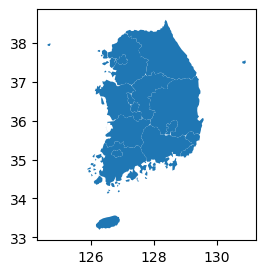

In [26]:
korea_sido.plot(figsize=(5,3))

## 3. Choropleth 지도 시각화

In [37]:
title = '대한민국 지역별 출산율 지도' # 타이틀
title_html = f'<h3 align="center" style="font-size:20px"><b>{title}</b></h3>'

# 기본 지도 생성하기
ft_map = folium.Map(location=[37.5665, 126.9780], zoom_start=7,
    tiles='cartodbpositron' # 타일 레이어
)

# 제목 추가하기
ft_map.get_root().html.add_child(folium.Element(title_html))

# Choropleth map 그리기
folium.Choropleth(
    geo_data= korea_sido, # GeoJSON 파일
    data= fert_total, # 데이터프레임
    columns=('지역', '출산율'), # 열
    key_on='feature.properties.CTP_KOR_NM', # key
    fill_color='YlGnBu', # 색상
    fill_opacity=0.7, # 투명도
    line_opacity=0.5, # 선 투명도
    legend_name='대한민국 출산율 지도' # 범례 이름
).add_to(ft_map)

ft_map # 지도 출력하기


컬러 바꾸기: https://colorbrewer2.org/#type=sequential&scheme=YlGnBu&n=3

In [47]:
# 지도 저장
ft_map.save('./Streamlit/HW3_elements/ft_map.html')

## 3-1. 추가정보를 넣어 개선한 지도 시각화

### ft_map_plus 만들기 (세부정보를 팝업으로 띄운 지도 하나 더 )

In [57]:
# 지도 초기화
ft_map_plus = folium.Map(location=[36.5, 127.5], zoom_start=7)


# Choropleth 추가
choropleth = folium.Choropleth(
    geo_data=korea_sido,
    data=fert,                               # fert : fert_total에 비해 세부정보가 남아있는 df
    columns=["지역", "출산율"],
    key_on="feature.properties.CTP_KOR_NM",  # GeoDataFrame과 fert를 연결할 필드
    fill_color="YlGnBu",
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name="합계출산율"
).add_to(ft_map_plus)

# 지역별 세부정보 팝업 추가
for idx, row in korea_sido.iterrows():
    region_name = row["CTP_KOR_NM"]  # 지역
    region_data = fert[fert["지역"] == region_name]  # 해당 지역 데이터를 필터링함
    
    if not region_data.empty:
        popup_text = f"""
        <b>{region_name}</b><br>
        출산율: {region_data["출산율"].values[0]}<br>
        15~19세(모의): {region_data["15~19세(모의)"].values[0]}<br>
        20~24세: {region_data["20~24세"].values[0]}<br>
        ...
        """
        # geometry에서 중심점 추출하고 중심점 좌표로 팝업위치 정함 
        folium.Marker(
            location=[row.geometry.centroid.y, row.geometry.centroid.x],
            popup=popup_text
        ).add_to(ft_map_plus)

ft_map_plus

너무 가독성이 안좋아서 중심점 방법은 drop

In [62]:
fert.columns

Index(['지역', '출산율', '15~19세(모의)', '20~24세', '25~29세', '30~34세', '35~39세',
       '40~44세', '45~49세'],
      dtype='object', name=0)

In [64]:
ft_map_plus = folium.Map(location=[36.5, 127.5], zoom_start=7)

choropleth = folium.Choropleth(
    geo_data=korea_sido,
    data=fert,
    columns=["지역", "출산율"],
    key_on="feature.properties.CTP_KOR_NM",
    fill_color="YlGnBu",
    legend_name="합계출산율"
).add_to(ft_map_plus)

# 지역별 세부정보 Tooltip 추가
for idx, row in korea_sido.iterrows():
    region_name = row["CTP_KOR_NM"]  # GeoDataFrame의 지역명
    region_data = fert[fert["지역"] == region_name]  # 해당 지역 데이터 필터링
    
    if not region_data.empty:
        # Tooltip에 들어갈 내용 적기
        tooltip_text = f"""
        <b>{region_name}</b><br>
        출산율: {region_data["출산율"].values[0]}<br>
        15~19세(모의): {region_data["15~19세(모의)"].values[0]}<br>
        20~24세: {region_data["20~24세"].values[0]}<br>
        25~29세: {region_data["25~29세"].values[0]}<br>
        30~34세: {region_data["30~34세"].values[0]}<br>
        35~39세: {region_data["35~39세"].values[0]}<br>
        40~44세: {region_data["40~44세"].values[0]}<br>
        45~49세: {region_data["45~49세"].values[0]}<br>
        """
        
        # GeoDataFrame의 중심점에 마커 추가
        folium.CircleMarker(
            location=[row.geometry.centroid.y, row.geometry.centroid.x],
            radius=10,  # 마커 크기
            color="blue",
            fill=True,
            fill_opacity=0.7,
            tooltip=tooltip_text
        ).add_to(ft_map_plus)

ft_map_plus


히트맵도 제작

참고: https://mkjjo.github.io/python/2019/08/18/korea_population.html

In [76]:
from folium.plugins import HeatMap

# GeoDataFrame에서 중심 좌표
korea_sido['centroid'] = korea_sido.geometry.centroid
korea_sido['centroid_lat'] = korea_sido['centroid'].y
korea_sido['centroid_lon'] = korea_sido['centroid'].x

# GeoDataFrame + 출산율 병합
merged = pd.merge(korea_sido, fert, left_on='CTP_KOR_NM', right_on='지역')

# HeatMap 계산 위한 df (포함열: 위도, 경도, 출산율)
heat_df = merged[['centroid_lat', 'centroid_lon', '출산율']]

# HeatMap
heat_data = [[row['centroid_lat'], row['centroid_lon'], row['출산율']] for index, row in heat_df.iterrows()]

# Folium 지도 만들고
ft_map_heat = folium.Map(location=[36.5, 127.5], tiles="OpenStreetMap", zoom_start=7)

# 거기에 HeatMap 추가
HeatMap(heat_data, radius=60, blur=40, min_opacity=0.4, max_val=heat_df['출산율'].max()).add_to(ft_map_heat)
# radius: 반경
# blur: 퍼진정도
# min_opacity : 투명도

ft_map_heat

C:\Users\hyunji\AppData\Local\Temp\ipykernel_31340\3254293043.py:4: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  korea_sido['centroid'] = korea_sido.geometry.centroid
C:\Users\hyunji\AppData\Local\Temp\ipykernel_31340\3254293043.py:21: UserWarning: The `max_val` parameter is no longer necessary. The largest intensity is calculated automatically.
  HeatMap(heat_data, radius=60, blur=40, min_opacity=0.4, max_val=heat_df['출산율'].max()).add_to(ft_map_heat)


In [77]:
# HTML로 저장
ft_map_heat.save("./Streamlit/HW3_elements/ft_map_heat.html")

## 4. Streamlit 대시보드 제작

In [ ]:
# 로컬 ver 

import streamlit as st


st.title("🌏 대한민국 출산율 지도")
st.write("🔍 통계청「인구동향조사-출생편」")
st.write("🔍 연령별 출산율 및 합계출산율(행정구역별)")

# 지도 출력

# 저장된 지도 HTML 파일 경로
ft_map_path = "C:/Users/hyunji/Documents/hongik_2024/2024-2/DataVZ/Streamlit/HW3_elements/ft_map.html"
ft_map_plus = "C:/Users/hyunji/Documents/hongik_2024/2024-2/DataVZ/Streamlit/HW3_elements/ft_map_plus.html"
ft_map_heat = "C:/Users/hyunji/Documents/hongik_2024/2024-2/DataVZ/Streamlit/HW3_elements/ft_map_heat.html"

# HTML 파일 내용 읽기
with open(ft_map_path, 'r', encoding='utf-8') as file1:
    map_html1 = file1.read()

with open(ft_map_plus, 'r', encoding='utf-8') as file2:
    map_html2 = file2.read()

with open(ft_map_heat, 'r', encoding='utf-8') as file3:
    map_html3 = file3.read()


# Streamlit에 HTML 렌더링
#st.components.v1.html(map_html, height=600)  # height 조정 가능

# 가독성을 위해 탭에 넣기 
# Streamlit 탭 설정
tab1, tab2, tab3 = st.tabs(["기본ver", "세부정보ver", "히트맵ver"])

with tab1:
    st.subheader("기본ver")
    st.components.v1.html(map_html1, height=600)

with tab2:
    st.subheader("세부정보ver")
    st.components.v1.html(map_html2, height=600)

with tab3:
    st.subheader("히트맵ver")
    st.components.v1.html(map_html3, height=600)

In [ ]:
# github ver
import streamlit as st


st.title("🌏 대한민국 출산율 지도")
st.write("🔍 통계청「인구동향조사-출생편」")
st.write("🔍 연령별 출산율 및 합계출산율(행정구역별)")

# 지도 출력

# 저장된 지도 HTML 파일 경로
ft_map_path = "ft_map.html"
ft_map_plus = "ft_map_plus.html"
ft_map_heat = "ft_map_heat.html"

# HTML 파일 내용 읽기
with open(ft_map_path, 'r', encoding='utf-8') as file1:
    map_html1 = file1.read()

with open(ft_map_plus, 'r', encoding='utf-8') as file2:
    map_html2 = file2.read()

with open(ft_map_heat, 'r', encoding='utf-8') as file3:
    map_html3 = file3.read()


# Streamlit에 HTML 렌더링
#st.components.v1.html(map_html, height=600)  # height 조정 가능

# 가독성을 위해 탭에 넣기 
# Streamlit 탭 설정
tab1, tab2, tab3 = st.tabs(["기본ver", "세부정보ver", "히트맵ver"])

with tab1:
    st.subheader("기본ver")
    st.components.v1.html(map_html1, height=600)

with tab2:
    st.subheader("세부정보ver")
    st.components.v1.html(map_html2, height=600)

with tab3:
    st.subheader("히트맵ver")
    st.components.v1.html(map_html3, height=600)